### Intro Sprint #2

# Web Scraping with Twitter and Reddit

Modified from the Fall 2020 workshop by [Melanie Walsh](https://melaniewalsh.org/).

## Why Collect Social Media Data?
* Maybe you're interested in internet language trends, like this [Pudding article about the rise of "lol" on Reddit](https://pudding.cool/2019/10/laugh/#lol).
* Maybe you're interested in Twitter bots, trolls, or online protest movements, like this [NYT article about Twitter bots and Hong Kong protestors or this 538 article about Russian trolls](https://www.nytimes.com/interactive/2019/09/18/world/asia/hk-twitter.html).
* Maybe you're interested in how online communities develop and relate to each other, like this [mapping of subreddits](https://lmcinnes.github.io/subreddit_mapping/subreddit_map.html) or this [538 piece about how people respond to politicians on Twitter](https://fivethirtyeight.com/features/the-worst-tweeter-in-politics-isnt-trump/).

## How Can We Collect Social Media Data Using Computational Tools?

### APIs vs Web Scraping

An **Application Programming Interface** (API) allows you to programmatically extract and interact with data under the hood of websites, social networks, and other projects that make their data publicly available. Twitter and Reddit both offer APIs that allow users to access their data. However, because these APIs are controlled by the companies themselves, they also come with limitations. For example, Twitter does not allow users to collect tweets more than one week in the past without a paid subscription.

Another way that you might collect data from the internet or social media is via web scraping. When you get data from an API, you're getting data from an internal source (from "inside" Twitter). When you "scrape" the surface of a web page, you're getting data from the user-facing surface of a web page, just like the web page you would pull up if you opened Chrome and typed "twitter.com". This makes web scraping sometimes clunky and unreliable when compared to an API, although it's often the only option if there's not an available API or the API does not offer what you're looking for.

### Reddit

Though Reddit has its own API, there is a more popular API for working with Reddit called **Pushshift**. You can read more about Pushshift in this arXiv article: https://arxiv.org/abs/2001.08435 (PDF)

> Why do people use Pushshift’s API instead of the official Reddit API?
>
>In short, Pushshift makes it much easier for researchers to query and retrieve historical Reddit data, provides extended functionality by providing fulltext search against comments and submissions, and has larger single query limits.
>
>Jason Baumgartner, et al., "The Pushshift Reddit Dataset"

#### Install PSAW

To work with the Pushshift API, we're going to install and use a Python wrapper called [PSAW](https://github.com/dmarx/psaw).

In [37]:
!pip3 install psaw

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Import pandas and matplotlib.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

Import PushshiftAPI

In [16]:
from psaw import PushshiftAPI

Initialize PushShiftAPI

In [17]:
api = PushshiftAPI()

#### PSAW Usage


To collect Reddit posts:

`api.search_submissions(subreddit="subrredit of interest", score=">certain upvote score", q="search keyword", before=date, after=date)`

To collect Reddit comments:

`api.search_comments(subreddit="subrredit of interest", score=">certain upvote score", q="search keyword", before=date, after=date)`

#### Collect Reddit submissions for a subreddit (with more than a certain upvote score)

Set up generator to make API request

In [18]:
api_request_generator = api.search_submissions(subreddit='AmITheAsshole', score = ">2000")

Grab data for each Reddit submission and make it into a dataframe.

In [19]:
aita_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

Check how many Reddit posts have been collected.

In [20]:
aita_submissions.shape

(2587, 80)

Check what columns/metadata are in the dataframe.

In [23]:
aita_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'edited', 'full_link',
       'gildings', 'id', 'is_created_from_ads_ui', 'is_crosspostable',
       'is_meta', 'is_original_content', 'is_reddit_media_domain',
       'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'suggested_sort', 'thum

In [22]:
aita_submissions[['title', 'score']].sample(10)

,title,score
1462,AITA for staying in a hotel because my parents...,5596
2235,AITA for not touching bf when he doesn’t shower?,2017
213,AITA for refusing to give my ex’s emergency nu...,2060
625,AITA for ‘embarrassing and traumatising’ my da...,4133
1684,AITA for telling my wife to stop making our da...,2664
1702,AITA for not letting my fiancé drive my car af...,3708
393,AITA For no longer saving money for my stepdau...,6256
1188,AITA for wearing a “political” shirt to my SOs...,2135
1872,AITA for going out to eat with friends despite...,2709
1289,AITA for not giving my cat back to her origina...,7994


Only select columns of interest and assign to a new dataframe.

In [24]:
aita_final = aita_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

aita_final

,author,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,57996A4333,AITA for revealing to my wife's family we didn...,EDIT/ I didn't know about what my wife was doi...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,3650,2373,1
1,Glittering_Sun_554,AITA for telling my husband I won’t be calling...,I’m currently 38+2 days pregnant and expected ...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,2944,1419,1
2,Spiritual_Weekend_78,AITA because I didn't let my daughter skip a g...,My kids are Jonah (14M) and Emma (12F) and my ...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,4461,5638,2
3,Additional_Whereas_6,UPDATE: AITA for booking to go away the same t...,Not sure if anyone really wanted an update but...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,8481,1819,1
4,throwaway-o10,AITA for moving out because my bf won’t do any...,My bf and I moved in together at the start of ...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,2462,1369,0
...,...,...,...,...,...,...,...,...
2582,kleen_next,AITA for shutting off the power to my neighbor...,I live in a building where the breaker box is ...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,2330,200,0
2583,BackgroundJellyfish,AITA for hitting my girlfriend out of reflex f...,"Hi, so my girlfriend and i watched a horror mo...",https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,2719,405,1
2584,Marylebone_Road,AITA for thinking that this sub is only so peo...,,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,2001,104,0
2585,grizzythekid,AITA for throwing a soda on the ground near th...,I was going to McDonald's for a quick bite to ...,https://www.reddit.com/r/AmItheAsshole/comment...,AmItheAsshole,3532,90,0


Now, we can export our finalized cleaned dataframe into a csv file.

In [25]:
aita_final.to_csv("aita_final.csv", encoding='utf-8', index=False)

## Collect Reddit submissions based on search keyword (with more than a certain upvote score)

Set up generator to make API request

In [26]:
api_request_generator = api.search_submissions(q='Cornell', score = ">2000")

Grab data for each Reddit submission and make into a DataFrame

In [27]:
cornell_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])
cornell_submissions.shape

/opt/homebrew/lib/python3.9/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


(93, 87)

In [28]:
cornell_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

,author,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,ccwarrenator,"My Grandpa fought in WW2, was a chemistry prof...",,https://i.redd.it/7ynkr3hyeze61.jpg,OldSchoolCool,11639,270,1.0
1,the_light_of_dawn,Reggie's Lecture At Cornell: Reggie Calls Wii ...,,https://www.resetera.com/threads/reggies-lectu...,NintendoSwitch,3410,363,0.0
2,evaee00,Can you please not apply to Cornell? My son wa...,So this is a story that happened to my friend ...,https://www.reddit.com/r/entitledparents/comme...,entitledparents,11375,241,0.0
3,BoomWhatWhat,Cornell will eliminate medical school debt for...,,https://www.cnn.com/2019/09/17/us/cornell-scho...,news,44406,2220,0.0
4,SirCSquared,I took this photo at the last Soundgarden conc...,,https://i.redd.it/op394mbhgkd31.jpg,lastimages,4759,185,0.0
...,...,...,...,...,...,...,...,...
88,SXS_Blackholes,Science AMA Series: We are graduate students a...,"We work in the field of numerical relativity, ...",http://www.reddit.com/r/science/comments/2l259...,science,3272,883,NaN
89,mubukugrappa,"The larger your friends, the larger your appet...",,http://foodpsychology.cornell.edu/op/the_fat_s...,science,3456,560,NaN
90,wpiman,My buddy is a third generation Cornell grad. H...,,http://www.livememe.com/d2k1qn5,AdviceAnimals,3085,883,NaN
91,A_Ninjas_Fart,Scientists at Cornell develop technique that k...,,http://www.voanews.com/content/scientists-deve...,science,2821,319,NaN


Where are the popular "Cornell" Reddit posts appearing?

In [29]:
cornell_submissions['subreddit'].value_counts()

science                 17
The_Donald               7
IAmA                     7
todayilearned            6
Music                    4
SandersForPresident      3
videos                   3
askscience               3
OldSchoolCool            3
news                     3
movies                   2
lastimages               2
Showerthoughts           2
politics                 2
InternetIsBeautiful      2
LadyBoners               1
lego                     1
interestingasfuck        1
Guitar                   1
coolguides               1
bidenbro                 1
EarthPorn                1
KotakuInAction           1
westworld                1
AskHistorians            1
uncensorednews           1
Metal                    1
RetroFuturism            1
SeattleWA                1
pics                     1
NintendoSwitch           1
relationships            1
CFB                      1
tattoos                  1
offmychest               1
AmItheAsshole            1
Damnthatsinteresting     1
A

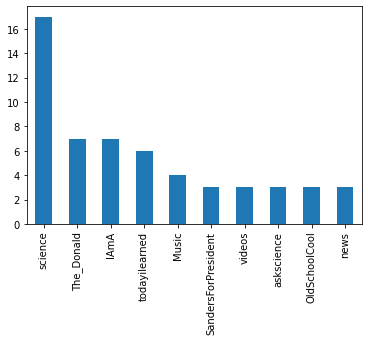

In [34]:
cornell_submissions['subreddit'].value_counts()[:10].plot(kind='bar')
plt.show()

## Twitter
We're going to collect Twitter data with the Python/command line tool [twarc](https://github.com/DocNow/twarc). This tool was developed by a project called Documenting the Now. The DocNow team develops tools and ethical frameworks for social media research.

In [91]:
!pip3 install twarc

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


## Twitter API Keys
Because twarc relies on Twitter's API, we need to apply for a Twitter developer account and create a Twitter application before we use it. You can find instructions for the application process and for installing and configuring twarc here: Twitter Collection Setup.

You can configure twarc by running twarc configure on the command line, or you can type your Twitter handle (without the @ symbol) and API keys into the quotation marks below and run the cell.

🚨 Skip running this cell if you've already configured twarc!! 🚨

In [98]:
#Insert Your Twitter API Info here

twitter_handle = "danagong8"
consumer_key= ""
consumer_secret = ""
access_token = ""
access_token_secret= ""

#The Code That Will Configure Twarc
configuration = f"""[{twitter_handle}]
consumer_key={consumer_key}
consumer_secret = {consumer_secret}
access_token = {access_token}
access_token_secret= {access_token_secret}
"""

import os
config_filename = os.path.join(os.path.expanduser("~"), ".twarc")
with open(config_filename, "w") as file_object:
    file_object.write(configuration)

### Collect Tweets From Past 7 days¶
With the free version of the Twitter API, there are basically two ways to collect your own Twitter data: in real time or ~7 days in the past. To get data any further in the past requires a paid version of the Twitter API. We're going to demonstrate how to collect Twitter data from the past ~7 days, but you can explore the other functionalities of Twarc by reading through the documentation.

## Usage
twarc search "cornell" > cornell_search.jsonl

To collect tweets from approximately 7 days in the past, you can use the command twarc search, followed by a search query, then the output operator > and a filename of your choosing with the ".jsonl" file extension (which outputs your Twitter data to this JSONL file).

Search for tweets that mention "cornell" but only from verified accounts

In [93]:
!twarc search "cornell filter:verified" > cornell_search.jsonl

How many tweets were collected?

In [94]:
!wc -l cornell_search.jsonl
# windows - 
#!find /v /c "" cornell_search.jsonl

     649 cornell_search.jsonl


In [95]:
!pip3 install python-json2csv

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Run this comamand if your python and pip are using the same version. To check, go into your terminal and type python -V and then pip -V. They should use the same version of pythong.

`!python twarc/utils/json2csv.py cornell_search.jsonl > cornell_search.csv`

In [96]:
!python twarc/utils/json2csv.py cornell_search.jsonl > cornell_search.csv

Traceback (most recent call last):
  File "twarc/utils/json2csv.py", line 8, in <module>
    from twarc import json2csv
ImportError: No module named twarc


In [97]:
import twarc
print(twarc.__file__)


/opt/homebrew/lib/python3.9/site-packages/twarc/__init__.py
